<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/Nagira/Final_notebook_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [259]:
data = pd.read_csv('/content/sample_data/all_season_summary.csv', low_memory=False)

In [260]:
data['winner'] = data.apply(lambda row: 'home_team' if row['winner'] == row['home_team'] else 'away_team', axis=1)

# Encode categorical features
encoder = LabelEncoder()
data['home_team'] = encoder.fit_transform(data['home_team'])
data['away_team'] = encoder.fit_transform(data['away_team'])
data['toss_won'] = encoder.fit_transform(data['toss_won'])
data['decision'] = encoder.fit_transform(data['decision'])
data['winner'] = encoder.fit_transform(data['winner'])  # Target column encoding 'home_overs', 'home_runs', 'home_wickets', 'away_overs', 'away_runs', 'away_wickets'
data['home_overs'] = encoder.fit_transform(data['home_overs'])
data['home_runs'] = encoder.fit_transform(data['home_runs'])
data['home_wickets'] = encoder.fit_transform(data['home_wickets'])
data['away_overs'] = encoder.fit_transform(data['away_overs'])
data['away_runs'] = encoder.fit_transform(data['away_runs'])
data['away_wickets'] = encoder.fit_transform(data['away_wickets'])

# Separate features and target
X = data[['home_team', 'away_team', 'toss_won', 'decision', 'home_overs', 'home_runs', 'home_wickets', 'away_overs', 'away_runs', 'away_wickets']]
y = data['winner']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [261]:
y_test

,winner
109,0
76,1
314,1
967,1
616,1
...,...
854,0
256,1
110,1
516,1


In [262]:
X_train

,home_team,away_team,toss_won,decision,home_overs,home_runs,home_wickets,away_overs,away_runs,away_wickets
526,14,4,4,1,56,100,4,14,31,4
377,8,5,5,1,56,110,8,58,111,5
477,11,4,4,1,56,109,7,53,117,5
408,14,1,13,0,56,115,4,58,104,5
292,13,0,0,1,56,75,7,58,83,6
...,...,...,...,...,...,...,...,...,...,...
87,4,8,4,1,32,86,5,58,89,4
330,4,11,4,1,49,101,6,58,104,7
466,2,11,10,0,53,106,4,58,108,2
121,3,9,3,0,56,67,8,34,73,2


# models

In [263]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [264]:
lr=LogisticRegression(max_iter=100)
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(accuracy_score(y_test,lr_pred))

0.9710144927536232


In [265]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(accuracy_score(y_test,rf_pred))

0.9033816425120773


In [266]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print(accuracy_score(y_test,gb_pred))

0.9178743961352657


In [267]:
xgb=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
print(accuracy_score(y_test,xgb_pred))

0.9130434782608695


In [268]:
models = {
    'Logistic Regression': lr_pred,
    'Random Forest': rf_pred,
    'Gradient Boosting': gb_pred,
    'XGBoost': xgb_pred,
}

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)

    print(f'{model_name}:')
    print(f'  Accuracy: {accuracy:.4f}')
    print(f'  F1 Score: {f1:.4f}')
    print(f'  Precision: {precision:.4f}')
    print(f'  Recall: {recall:.4f}')
    print(f'  Confusion Matrix:\n{confusion}')
    print("_ " *20)

Logistic Regression:
  Accuracy: 0.9710
  F1 Score: 0.9710
  Precision: 0.9712
  Recall: 0.9710
  Confusion Matrix:
[[ 95   2]
 [  4 106]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Random Forest:
  Accuracy: 0.9034
  F1 Score: 0.9034
  Precision: 0.9037
  Recall: 0.9034
  Confusion Matrix:
[[88  9]
 [11 99]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Gradient Boosting:
  Accuracy: 0.9179
  F1 Score: 0.9179
  Precision: 0.9180
  Recall: 0.9179
  Confusion Matrix:
[[ 89   8]
 [  9 101]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
XGBoost:
  Accuracy: 0.9130
  F1 Score: 0.9131
  Precision: 0.9133
  Recall: 0.9130
  Confusion Matrix:
[[ 89   8]
 [ 10 100]]
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


  '''    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },'''

# Evaluation metrics

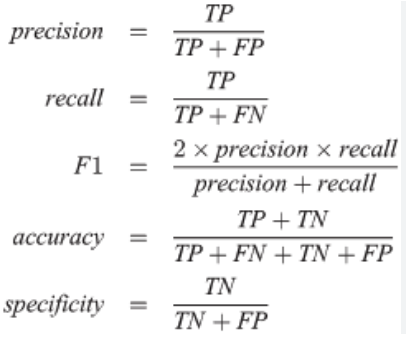

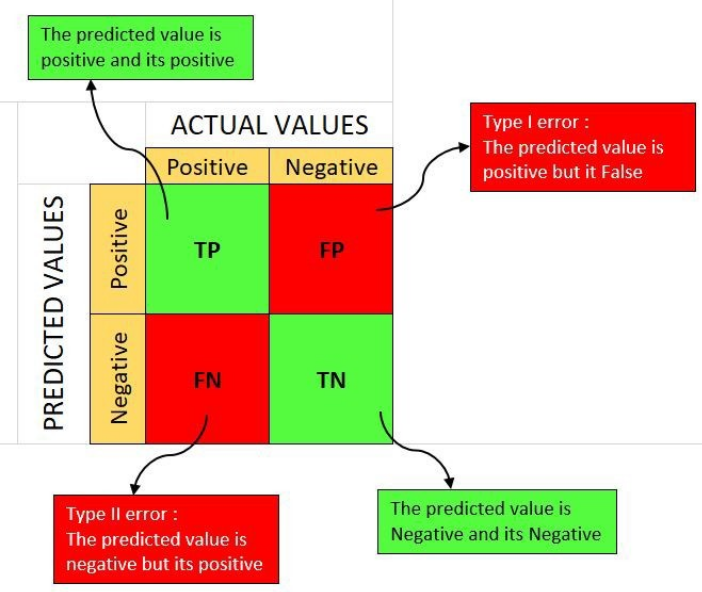

# Parameter Hypertuning

In [269]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [270]:
logreg = LogisticRegression()
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, random_state=42)

random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

lg_predict=random_search.predict(X_test)
print(f' Accuracy: {accuracy_score(y_test, lg_predict)}')


# Get the best model
best_model = random_search.best_estimator_

cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
 Accuracy: 0.9710144927536232
Cross-validation scores: [0.97584541 0.97584541 0.97572816 0.97572816 0.95631068]


# PREDICTION

In [271]:
# PREDICTION
new_data = pd.DataFrame({
    'home_team': ['SRH'],
    'away_team': ['PBKS'],
    'toss_won': ['SRH'],
    'decision': ['BOWL FIRST'],
    'home_overs': [17],
    'home_runs': [145],
    'home_wickets': [2],
    'away_overs': [20],
    'away_runs': [143],
    'away_wickets': [9],
})

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) # Initialize OrdinalEncoder
encoded_new_data = new_data.copy()

for column in ['home_team', 'away_team', 'toss_won', 'decision']:
    if encoded_new_data[column].dtype == 'object':
         encoded_new_data[column] = encoder.fit_transform(encoded_new_data[[column]])

X_new = encoded_new_data[['home_team', 'away_team', 'toss_won', 'decision', 'home_overs', 'home_runs', 'home_wickets', 'away_overs', 'away_runs', 'away_wickets']]
X_new = imputer.transform(X_new)


for model_name, model in zip(models.keys(), [lr,rf,gb,xgb,svc,knn]):
    prediction = model.predict(X_new)
    print(f'{model_name} Prediction: {prediction}')

lg_predict = random_search.predict(X_new)
print(f'Logistic Regression (Random Search) Prediction: {lg_predict}')

Logistic Regression Prediction: [1]
Random Forest Prediction: [1]
Gradient Boosting Prediction: [1]
XGBoost Prediction: [1]
Logistic Regression (Random Search) Prediction: [1]
